<a href="https://colab.research.google.com/github/anas-789/Tumar-Detection-using-SAM2-YOLOv11-/blob/main/SAM2_YOLO11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **SAM2 YOLO11 TUMOR DETECTION MODEL**

---



In [4]:
!pip install ultralytics

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from ultralytics import YOLO

# Load a COCO-pretrained YOLO11n model
model = YOLO("yolo11n.pt")

# path =
# train the model
train_results = model.train(
    data = "/content/drive/MyDrive/Tumor Detection/data.yaml",
    epochs = 20,
    imgsz = 640,
    device = 0,
)



image 1/1 /content/drive/MyDrive/Tumor Detection/test_images/glioma_1246_jpg.rf.af4ca1f2e92bf1e7df0360136f128877.jpg: 640x640 2 gliomas, 13.1ms
Speed: 4.9ms preprocess, 13.1ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict


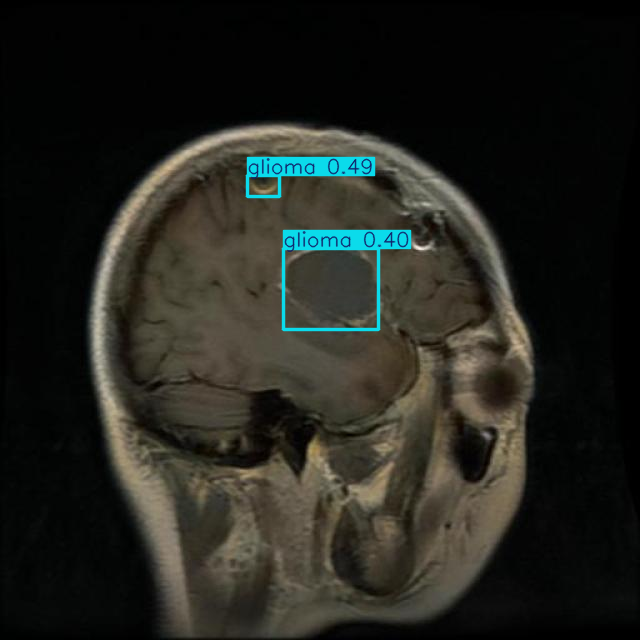

In [ ]:
from ultralytics import YOLO

# Load a COCO-pretrained YOLO11n model
model = YOLO("/content/runs/detect/train/weights/best.pt")

# Perform object detection on an image
result = model(
    "/content/drive/MyDrive/Tumor Detection/test_images/glioma_1246_jpg.rf.af4ca1f2e92bf1e7df0360136f128877.jpg",
    save = True
)

result[0].show()

In [ ]:
# Load model
model = YOLO('/content/runs/detect/train/weights/best.pt')

# Perform object detection on an image
result = model("/content/drive/MyDrive/Tumor Detection/test_images", save = True)



image 1/5 /content/drive/MyDrive/Tumor Detection/test_images/glioma_1246_jpg.rf.af4ca1f2e92bf1e7df0360136f128877.jpg: 640x640 2 gliomas, 10.2ms
image 2/5 /content/drive/MyDrive/Tumor Detection/test_images/meningioma_135_jpg.rf.b1bd93c944be730f116109de74a88bb5.jpg: 640x640 1 meningioma, 11.0ms
image 3/5 /content/drive/MyDrive/Tumor Detection/test_images/meningioma_465_jpg.rf.9f59c836d9cb2c93bfb2110ce9547b66.jpg: 640x640 1 meningioma, 9.4ms
image 4/5 /content/drive/MyDrive/Tumor Detection/test_images/no_tumor_157_jpg.rf.71dd2a7bda42370dea43c2b2336f0ea0.jpg: 640x640 1 NO_tumor, 17.3ms
image 5/5 /content/drive/MyDrive/Tumor Detection/test_images/pituitary_407_jpg.rf.52373232b5b4c4b4c202b2c0c67a7fcd.jpg: 640x640 1 pituitary, 9.0ms
Speed: 2.1ms preprocess, 11.4ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict2


In [ ]:
from ultralytics import YOLO

# load Model
model = YOLO('/content/runs/detect/train/weights/best.pt')

# Perform object detection on an image
result = model("/content/drive/MyDrive/Tumor Detection/test_images/meningioma_465_jpg.rf.9f59c836d9cb2c93bfb2110ce9547b66.jpg")

# process results list
for r in result:
    boxes = r.boxes
    print(boxes)


image 1/1 /content/drive/MyDrive/Tumor Detection/test_images/meningioma_465_jpg.rf.9f59c836d9cb2c93bfb2110ce9547b66.jpg: 640x640 1 meningioma, 9.5ms
Speed: 2.4ms preprocess, 9.5ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)
ultralytics.engine.results.Boxes object with attributes:

cls: tensor([2.], device='cuda:0')
conf: tensor([0.9662], device='cuda:0')
data: tensor([[179.3567,  90.9788, 312.1181, 193.2563,   0.9662,   2.0000]], device='cuda:0')
id: None
is_track: False
orig_shape: (640, 640)
shape: torch.Size([1, 6])
xywh: tensor([[245.7374, 142.1175, 132.7614, 102.2775]], device='cuda:0')
xywhn: tensor([[0.3840, 0.2221, 0.2074, 0.1598]], device='cuda:0')
xyxy: tensor([[179.3567,  90.9788, 312.1181, 193.2563]], device='cuda:0')
xyxyn: tensor([[0.2802, 0.1422, 0.4877, 0.3020]], device='cuda:0')


In [ ]:
from ultralytics import YOLO
from ultralytics import SAM

# load Model YOLO Model
yolo_model = YOLO('/content/runs/detect/train/weights/best.pt')

# Perform object detection on an image
results = yolo_model('/content/drive/MyDrive/Tumor Detection/test_images/', save=True)

# Load SAM Model
sam_model = SAM("sam2_b.pt")

for result in results:
  class_ids = result.boxes.cls.int().tolist()
  if len(class_ids):
    boxes = result.boxes.xyxy
    sam_results = sam_model(
        result.orig_img,
        bboxes = boxes,
        verbose = False,
        save = True,
        device = 0
    )



image 1/5 /content/drive/MyDrive/Tumor Detection/test_images/glioma_1246_jpg.rf.af4ca1f2e92bf1e7df0360136f128877.jpg: 640x640 2 gliomas, 8.5ms
image 2/5 /content/drive/MyDrive/Tumor Detection/test_images/meningioma_135_jpg.rf.b1bd93c944be730f116109de74a88bb5.jpg: 640x640 1 meningioma, 8.6ms
image 3/5 /content/drive/MyDrive/Tumor Detection/test_images/meningioma_465_jpg.rf.9f59c836d9cb2c93bfb2110ce9547b66.jpg: 640x640 1 meningioma, 8.4ms
image 4/5 /content/drive/MyDrive/Tumor Detection/test_images/no_tumor_157_jpg.rf.71dd2a7bda42370dea43c2b2336f0ea0.jpg: 640x640 1 NO_tumor, 8.3ms
image 5/5 /content/drive/MyDrive/Tumor Detection/test_images/pituitary_407_jpg.rf.52373232b5b4c4b4c202b2c0c67a7fcd.jpg: 640x640 1 pituitary, 14.9ms
Speed: 1.9ms preprocess, 9.8ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict4
Results saved to runs/segment/predict4
Results saved to runs/segment/predict4
Results saved to runs/segment/predict4
Results saved 